# Lecture 9: Basics of Curve Fitting: The Generalized Linear Model
> All models are wrong but some are useful. 
> *([George Box, 1976](http://www.tandfonline.com/doi/abs/10.1080/01621459.1976.10480949#.VrkhMMd6FBw))*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

## Objectives

+ Generalized linear models
+ Least squares
+ Maximum Likelihood Estimate

## Readings

Before coming to class, please read the following:

+ [Ch. 3 of Bishop, 2006](http://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738)

+ [Ohio State University, Bayesian Linear Regression](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&ved=0ahUKEwikxsiPuJPKAhVE32MKHRoMCtsQFggyMAI&url=http%3A%2F%2Fweb.cse.ohio-state.edu%2F~kulis%2Fteaching%2F788_sp12%2Fscribe_notes%2Flecture5.pdf&usg=AFQjCNFvxuyBfFkRN8bdJAvd_dlZdsShEw&sig2=UqakvfANehNUUK1J9rXIiQ)

You can also check out this 10 minutes short Youtube video on Bayesian Linear Regression - 
+ [Mathematicalmonk, Bayesian Linear Regression](https://www.youtube.com/watch?v=dtkGq9tdYcI)

## Supervised learning - Regression
Say that you observe $n$, $d$-dimensional, *inputs*:
$$
\mathbf{x}_{1:n} = \{\mathbf{x}_1,\dots,\mathbf{x}_n\},
$$
and *outputs*:
$$
\mathbf{y}_{1:n} = \{y_1,\dots,y_n\}.
$$
The regression problem consits of using the data $\mathbf{x}_{1:n}$ and $\mathbf{y}_{1:n}$ to find
the map that connects the inputs to the outputs.

We will be playing with the following dataset consisting of motorcycle crash data.
Namely, it records the observed head acceleration (in g) at different times (in miliseconds) after the crash.

Text(0, 0.5, '$y$')

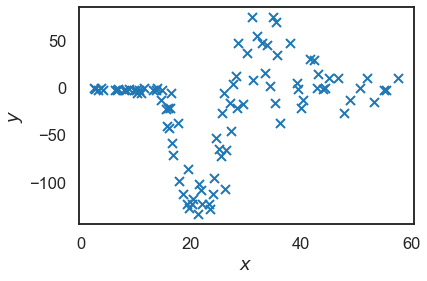

In [3]:
data = np.loadtxt('motor.dat')
X = data[:, 0][:, None]
Y = data[:, 1]
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### Regression model
+ Any model that connects $\mathbf{x}$ to $y$ through the use of some parameters.
+ Linear regression:
$$
y(\mathbf{x}; \mathbf{w}) = w_{0} + w_{1}x_{1} + ... + w_{D}x_{D},
$$
+ Generalized linear model:
$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})}
$$
where $\mathbf{w} = (w_{1}, ... , w_{m})^{T}$ and $\boldsymbol{\phi} = (\phi_{1}, ..., \phi_{m})^{T}$ are arbitrary basis functions.

### Naming conventions
+ $\mathbf{x}$: input
+ $\phi_i(\mathbf{x})$: feature or basis function
+ $y$: output or target

### Generalized linear model
+ Note that the *generalized linear model*:
$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\phi(x)},
$$
is linear in $\mathbf{w}$ not $\mathbf{x}$.
+ $\boldsymbol{\phi}(\mathbf{x})$ can be non-linear.

### Examples of generalized linear models:
Remember:
$$
y(x;\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\phi(x)}.
$$
Some examples of $\phi_j(\mathbf{x})$'s are:
+ Linear, $\phi_j(\mathbf{x}) = x_j$.
+ Polynomials, $\phi_j(x) = \sum_{\alpha\in\mathcal{A}_j}\beta_{\alpha}\mathbf{x}^{\alpha}$.
+ Radial basis function, $\phi_j(x) = \exp\left\{-\frac{\parallel \mathbf{x} - \mathbf{x}_j\parallel^2}{2\ell^2}\right\}$.
+ Fourier series, $\phi_{2j}(x) = \cos\left(\frac{2j\pi}{L}x\right)$ and $\phi_{2j+1}(x)=\sin\left(\frac{2j\pi}{L}x\right)$.
+ $\dots$

## Fitting GLMs using Least Squares
+ First published by [Legendre](https://en.wikipedia.org/wiki/Adrien-Marie_Legendre) in 1805.
+ The idea is to find the best $\mathbf{w}$ by minimizing a quadratic loss function:
$$
\mathcal{L}(\mathbf{w})\equiv\mathcal{L}(\mathbf{w};\mathbf{x}_{1:n},\mathbf{y}_{1:n}) = \sum_{i=1}^n\left[y(\mathbf{x}_i;\mathbf{w}) - y_i\right]^2.
$$

### Expressing the Loss Function using Matrix-Vector multiplication
+ The loss function can be re-expressed as:
$$
\begin{array}{ccc}
\mathcal{L}(\mathbf{w}) &=& \lVert\boldsymbol{\Phi}\mathbf{w} - \mathbf{y}_{1:n}\rVert^2\\
&=& \left(\boldsymbol{\Phi}\mathbf{w} - \mathbf{y}_{1:n}\right)^T\left(\boldsymbol{\Phi}\mathbf{w} - \mathbf{y}_{1:n}\right).
\end{array}
$$
+ Here $\boldsymbol{\Phi}\in\mathbb{R}^{n\times m}$ is the **design matrix**:
$$
\Phi_{ij} = \phi_j(\mathbf{x}_j).
$$

### Minimizing the Loss Function
+ Take the derivative of $\mathcal{L}(\mathbf{w})$ with respect to $\mathbf{w}$.
+ Set it equal to zero and solve for $\mathbf{w}$.
+ You will get [(Bishop, 2006)](http://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738):
$$
\mathbf{w}_{\mbox{LS}} = \left(\mathbf{\Phi}^{T}\mathbf{\Phi}\right)^{-1}\mathbf{\Phi}^{T}\mathbf{y}_{1:n}.
$$

### How NOT to Solve a Linear Least Squares Problem
+ Our goal is to find:
$$
\mathbf{w}_{\mbox{LS}} = \left(\mathbf{\Phi}^{T}\mathbf{\Phi}\right)^{-1}\mathbf{\Phi}^{T}\mathbf{y}_{1:n}.
$$
+ The worst thing you can do is find $\mathbf{\Phi^{T}\Phi}$ and invert it.
+ Why?

### How to Solve a Linear Least Squares Problem
+ You compute the [QR decomposition](https://en.wikipedia.org/wiki/QR_decomposition) of $\mathbf{\Phi}$, i.e.,
$$
\mathbf{\Phi} = \mathbf{QR},
$$
where $\mathbf{Q}\in\mathbb{R}^{n\times n}$ is [orthogonal](https://en.wikipedia.org/wiki/Orthogonal_matrix), i.e.,
$\mathbf{Q}^T\mathbf{Q} = \mathbf{I}$, and $\mathbf{R}\in\mathbb{R}^{n\times m}$ upper [triangular](https://en.wikipedia.org/wiki/Triangular_matrix).
+ Then, solve the following problem using [backward substitution](https://en.wikipedia.org/wiki/Triangular_matrix#Forward_substitution):
$$
\mathbf{R}\mathbf{w}_{\mbox{LS}} = \mathbf{Q}\mathbf{y}_{1:n}.
$$

### How to Actually Solve a Linear Least Squares Problem
+ Just use:

> [numpy.linalg.lstsq](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.lstsq.html)

+ You give it $\mathbf{\Phi}$ and $\mathbf{y}_{1:n}$ and it returns $\mathbf{w}_{\mbox{LS}}$.

### Example - Linear Least Squares - Linear Features
We will use two features ($m=2$):
$$
\phi_1(\mathbf{x}) = 1,
$$
and
$$
\phi_2(\mathbf{x}) = x.
$$

In [4]:
# Implementation of the basis functions
class LinearBasis(object):
    """
    Represents a 1D linear basis.
    """
    def __init__(self):
        self.num_basis = 2 # The number of basis functions
    def __call__(self, x):
        """
        ``x`` should be a 1D array.
        """
        return [1., x[0]]

In [5]:
# This can be used as a function, for example:
phi = LinearBasis()
print(phi([4.]))   # The input has to be an array

[1.0, 4.0]


In [6]:
# We need a generic function that computes the design matrix
def compute_design_matrix(X, phi):
    """
    Arguments:
    
    X   -  The observed inputs (1D array)
    phi -  The basis functions.
    """
    num_observations = X.shape[0]
    num_basis = phi.num_basis
    Phi = np.ndarray((num_observations, num_basis))
    for i in range(num_observations):
        Phi[i, :] = phi(X[i, :])
    return Phi

In [7]:
# Let's test this:
Phi = compute_design_matrix(X, phi)
print('Phi:')
print(Phi[:5, :])

Phi:
[[1.  2.4]
 [1.  2.6]
 [1.  3.2]
 [1.  3.6]
 [1.  4. ]]


In [8]:
# Ready to do least squares:
w_LS = np.linalg.lstsq(Phi, Y, rcond=None)[0]
print('w_LS:')
print(w_LS)

w_LS:
[-44.74302734   0.88644729]


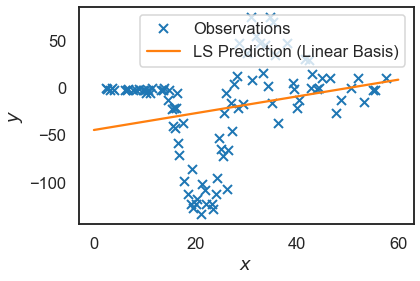

In [9]:
# Let's plot the result on these points:
X_p = np.linspace(0, 60, 100)[:, None]
Phi_p = compute_design_matrix(X_p, phi)
Y_p = np.dot(Phi_p, w_LS)
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='LS Prediction (Linear Basis)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best')

### Let's try Polynomials of Higher Degree

$$
\phi_j(x) = x^{j-1}, j=1,\dots,m
$$

In [10]:
# Here is a class for the polynomials:
class PolynomialBasis(object):
    """
    A set of linear basis functions.
    
    Arguments:
    degree  -  The degree of the polynomial.
    """
    def __init__(self, degree):
        self.degree = degree
        self.num_basis = degree + 1
    def __call__(self, x):
        return np.array([x[0] ** i for i in range(self.degree + 1)])

Text(0, 0.5, '$\\phi_i(x)$')

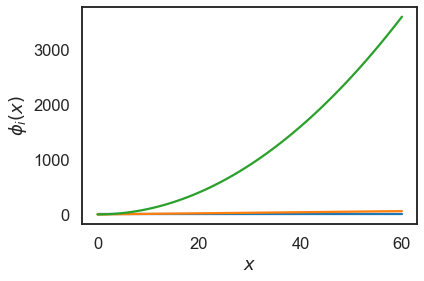

In [11]:
# Let's visualize the basis functions
degree = 2
phi = PolynomialBasis(degree)
Phi_p = compute_design_matrix(X_p, phi)
plt.plot(X_p, Phi_p)
plt.xlabel('$x$')
plt.ylabel('$\phi_i(x)$')
# It does not look very pretty because the polynomials grow very fast.

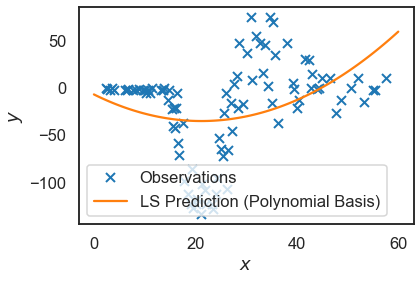

In [12]:
# Let's do the regression
Phi = compute_design_matrix(X, phi)
w_LS = np.linalg.lstsq(Phi, Y, rcond=None)[0]
Y_p = np.dot(Phi_p, w_LS)
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='LS Prediction (Polynomial Basis)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Questions

+ Experiment with polynomials of degree 4, 5, 10, 20
+ When are we underfitting?
+ When are we overfitting?
+ Which degree (if any) gives you the best fit?

### Let's try a Fourier Basis
$$
\phi_{2j}(x) = \cos\left(\frac{2j\pi}{L}x)\right),
$$
and
$$
\phi_{2j+1}(x) = \sin\left(\frac{2j\pi}{L}x)\right),
$$
for $j=1,\dots,m/2$.

In [13]:
# Here is a class for the Fourier basis:
class FourierBasis(object):
    """
    A set of linear basis functions.
    
    Arguments:
    num_terms  -  The number of Fourier terms.
    L          -  The period of the function.
    """
    def __init__(self, num_terms, L):
        self.num_terms = num_terms
        self.L = L
        self.num_basis = 2 * num_terms
    def __call__(self, x):
        res = np.ndarray((self.num_basis,))
        for i in range(num_terms):
            res[2 * i] = np.cos(2 * i * np.pi / self.L * x[0])
            res[2 * i + 1] = np.sin(2 * (i+1) * np.pi / self.L * x[0])
        return res

Text(0.5, 0, '$x$')

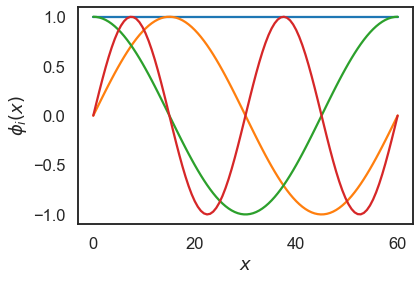

In [14]:
# Let's visualize the basis functions
num_terms = 2
L = 60.
phi = FourierBasis(num_terms, L)
Phi_p = compute_design_matrix(X_p, phi)
plt.plot(X_p, Phi_p);
plt.ylabel(r'$\phi_i(x)$')
plt.xlabel('$x$')

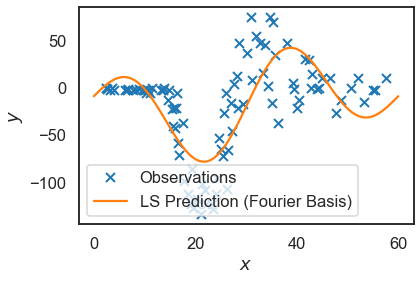

In [15]:
# Let's do the regression
Phi = compute_design_matrix(X, phi)
w_LS = np.linalg.lstsq(Phi, Y, rcond=None)[0]
Y_p = np.dot(Phi_p, w_LS)
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='LS Prediction (Fourier Basis)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Questions

+ Experiment with 4, 10, 20, 40, terms.
+ When are we underfitting?
+ When are we overfitting?
+ Which one (if any) gives you the best fit?

### Let's try a radial basis function approximation:
$$
\phi_i(x) = \exp\left\{-\frac{(x-x_i^c)^2}{2\ell^2}\right\},
$$
where $x_i^c$ are points about each the basis functions are centered.

In [16]:
# Here is a class for the polynomials:
class RadialBasisFunctions(object):
    """
    A set of linear basis functions.
    
    Arguments:
    X   -  The centers of the radial basis functions.
    ell -  The assumed lengthscale.
    """
    def __init__(self, X, ell):
        self.X = X
        self.ell = ell
        self.num_basis = X.shape[0]
    def __call__(self, x):
        return np.exp(-.5 * (x - self.X) ** 2 / self.ell ** 2).flatten()

Text(0.5, 0, '$x$')

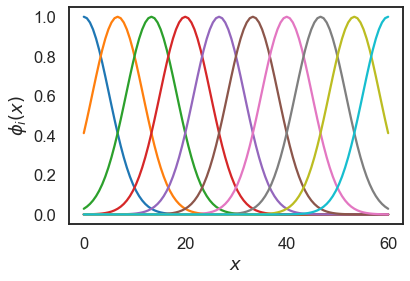

In [17]:
ell = 5.
num_terms = 10
Xc = np.linspace(0, 60, num_terms)
phi = RadialBasisFunctions(Xc, ell)
Phi_p = compute_design_matrix(X_p, phi)
plt.plot(X_p, Phi_p);
plt.ylabel(r'$\phi_i(x)$')
plt.xlabel('$x$')

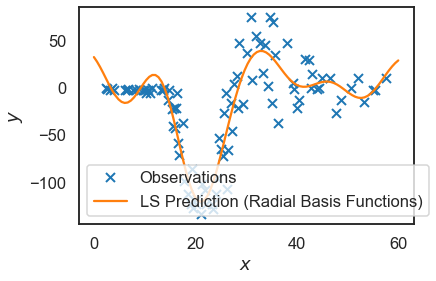

In [18]:
# Let's do the regression
Phi = compute_design_matrix(X, phi)
w_LS = np.linalg.lstsq(Phi, Y, rcond=None)[0]
Y_p = np.dot(Phi_p, w_LS)
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='LS Prediction (Radial Basis Functions)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Questions

+ Experiment with different values of ell and centers.
+ When are we underfitting?
+ Which one (if any) gives you the best fit?

### Let's try an approximation using step functions:
$$
\phi_i(x) = \begin{cases} 1,& x\ge x_i^c\\
                          0,&\;\mbox{otherwise},
\end{cases}
$$
where $x_i^c$ are points about each the basis functions are centered.

In [19]:
# Here is a class for the polynomials:
class StepFunctionBasis(object):
    """
    A set of step functions.
    
    Arguments:
    X   -  The centers of the step functions.
    """
    def __init__(self, X):
        self.X = X
        self.num_basis = X.shape[0]
    def __call__(self, x):
        res = np.ones((self.num_basis, ))
        res[x < self.X.flatten()] = 0.
        return res

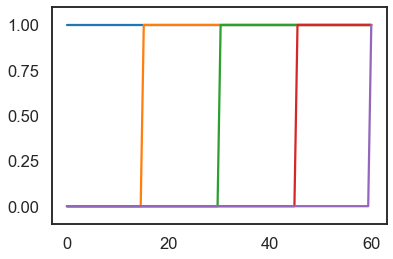

In [20]:
Xc = np.linspace(0, 60, 5)
phi = StepFunctionBasis(Xc)
Phi_p = compute_design_matrix(X_p, phi)
plt.plot(X_p, Phi_p)
plt.ylim([-.1, 1.1]);

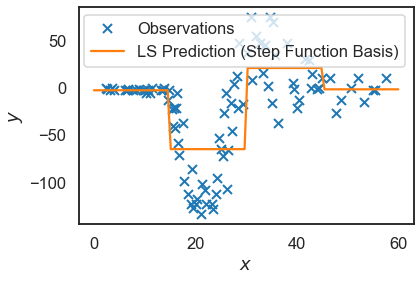

In [21]:
# Let's do the regression
Phi = compute_design_matrix(X, phi)
w_LS = np.linalg.lstsq(Phi, Y, rcond=None)[0]
Y_p = np.dot(Phi_p, w_LS)
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='LS Prediction (Step Function Basis)')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Questions

+ Experiment with different number of centers.
+ When are we underfitting?
+ When are we overfitting?
+ Which one (if any) gives you the best fit?

### Issues with Least Squares
+ How do I quantify the measurement noise?
+ How many basis functions should I use?
+ Which basis functions should I use?
+ How do I pick the parameters of the basis functions, e.g., the lengthscale $\ell$ of the RBFs?

## Probabilistic Regression - Version 1

+ We wish to model the data using some **fixed** basis/features:
$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w}^T\boldsymbol{\phi}(\mathbf{x})
$$

+ We *model the measurement process* using a **likelihood** function:
$$
\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w} \sim p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}).
$$

### Interpretation
+ $p(\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w})$ tells us:

> How plausible is it to observe $\mathbf{y}_{1:n}$ at inputs $\mathbf{x}_{1:n}$, if we know that the model parameters are $\mathbf{w}$?

### Properties of the Likelihood
If the measurements are independent, then (probability theory):
$$
p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}) = \prod_{i=1}^np(y_i|\mathbf{x}_i, \mathbf{w}),
$$
where $p(y_i|\mathbf{x}_i,\mathbf{w})$ is the likelihood of a single measurement.

### The Gaussian Likelihood
+ We assign:
$$
\begin{array}{ccc}
p(y_i|\mathbf{x}_i, \mathbf{w}, \sigma) &=& \mathcal{N}\left(y_i| y(\mathbf{x}_i;\mathbf{w}), \sigma^2\right)\\
&=& \mathcal{N}\left(y_i | \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x}_i)}, \sigma^2\right),
\end{array}
$$
where $\sigma$ models the **noise**.
+ We say:

> We beleive that our measurement is around the model prediction $\mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})}$
but it is contaminated with Gaussian noice of variance $\sigma^2$.

### The Gaussian Likelihood of Many Independent Observations
We have:
$$
p(\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w}, \sigma) = \mathcal{N}\left(\mathbf{y}_{1:n} | \mathbf{\Phi}\mathbf{w}, \sigma^2\mathbf{I}_n\right).
$$
Let's look at the function form ([Wiki](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)):
$$
p(\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w}, \sigma) 
= (2\pi)^{-\frac{n}{2}}\sigma^{-n} e^{-\frac{1}{2\sigma^2}\lVert\mathbf{\Phi}\mathbf{w}-\mathbf{y}_{1:n}\rVert^2}.
$$

### Maximum Likelihood Estimate of $\mathbf{w}$

+ Once we have a likelihood, we can train the model by maximizing the likelihood:
$$
\mathbf{w}_{\mbox{MLE}} = \arg\max_{\mathbf{w}} p(\mathbf{y}_{1:n}, |\mathbf{x}_{1:n}, \mathbf{w}, \sigma).
$$
+ For Gaussian likelihood
$$
{\tiny
\log p(\mathbf{y}_{1:n}, |\mathbf{x}_{1:n}, \mathbf{w}, \sigma) =
-\frac{n}{2}\log(2\pi)
-n\log\sigma
- \frac{1}{2\sigma^2}\lVert\mathbf{\Phi}\mathbf{w}-\mathbf{y}_{1:n}\rVert^2.
}
$$
+ And we find that:
$$
\mathbf{w}_{\mbox{MLE}} \equiv \mathbf{w}_{\mbox{LS}}.
$$

### Maximum Likelihood Estimate of $\sigma$
+ You just have to maximize likelihood also over $\sigma$.
+ For Gaussian likelihood:
    + Take the derivative of $p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n},\mathbf{w}_{\mbox{MLE}},\sigma)$ with respect to $\sigma$.
    + Set to zero, and solve for $\sigma$.
    + You will get:
$$
{\tiny
\sigma_{\mbox{MLE}}^2 = \frac{\lVert \mathbf{\Phi}\mathbf{w} - \mathbf{y}_{1:n}\rVert^2}{n}.
}
$$

### Making Predictions
+ How do we make predictions about $y$ at a new point $\mathbf{x}$?
+ We just use the laws of probability...
+ For the Gaussian likelihood, the **predictive distribution** is:
$$
{\tiny
p(y|\mathbf{x}, \mathbf{w}_{\mbox{MLE}}, \sigma^2_{\mathbf{\mbox{MLE}}}) = 
\mathcal{N}\left(y\middle|\mathbf{w}_{\mbox{MLE}}^T\mathbf{\phi}(\mathbf{x}), \sigma_{\mbox{MLE}}^2\right).
}
$$
+ Let's try it out.

### Polynomials

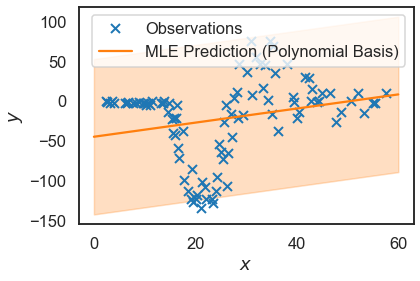

In [22]:
# Let's do it
degree = 1
phi = PolynomialBasis(degree)
Phi = compute_design_matrix(X, phi)
w_MLE, res_MLE = np.linalg.lstsq(Phi, Y, rcond=None)[0:2] # Note that we
                                              # now also use the second
                                              # output of lstsq...
sigma_MLE = np.sqrt(res_MLE / X.shape[0])
Phi_p = compute_design_matrix(X_p, phi)
Y_p = np.dot(Phi_p, w_MLE)
Y_l = Y_p - 2. * sigma_MLE # Lower predictive bound
Y_u = Y_p + 2. * sigma_MLE # Upper predictive bound
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='MLE Prediction (Polynomial Basis)')
ax.fill_between(X_p.flatten(), Y_l, Y_u, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Radial Basis Functions

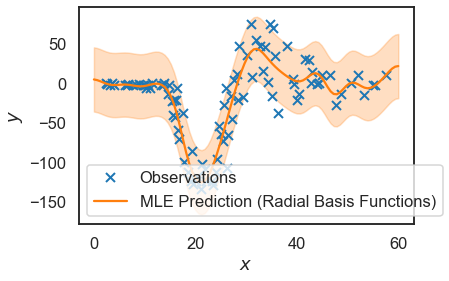

In [23]:
ell = 2.
Xc = np.linspace(0, 60, 20)
phi = RadialBasisFunctions(Xc, ell)
Phi = compute_design_matrix(X, phi)
w_MLE, res_MLE = np.linalg.lstsq(Phi, Y, rcond=None)[0:2] # Note that we
                                              # now also use the second
                                              # output of lstsq...
sigma_MLE = np.sqrt(res_MLE / X.shape[0])
Phi_p = compute_design_matrix(X_p, phi)
Y_p = np.dot(Phi_p, w_MLE)
Y_l = Y_p - 2. * sigma_MLE # Lower predictive bound
Y_u = Y_p + 2. * sigma_MLE # Upper predictive bound
fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2, label='Observations')
ax.plot(X_p, Y_p, label='MLE Prediction (Radial Basis Functions)')
ax.fill_between(X_p.flatten(), Y_l, Y_u, color=sns.color_palette()[1], alpha=0.25)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

### Issues with Maximum Likelihood
+ How many basis functions should I use?
+ Which basis functions should I use?
+ How do I pick the parameters of the basis functions, e.g., the lengthscale $\ell$ of the RBFs?

### Questions

Plot the MLE noise error bars for:

+ A Fourier-basis model.
+ The stepfunction-basis model.